# Inception-v3

*170616 Masahiro Rikiso*

---

In [6]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget --no-check-certificate -O elephant.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/320px-African_Bush_Elephant.jpg

--2017-06-16 18:21:54--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/320px-African_Bush_Elephant.jpg
Resolving upload.wikimedia.org... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37504 (37K) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>]  36.62K  --.-KB/s    in 0.1s    

2017-06-16 18:21:54 (281 KB/s) - ‘elephant.jpg’ saved [37504/37504]



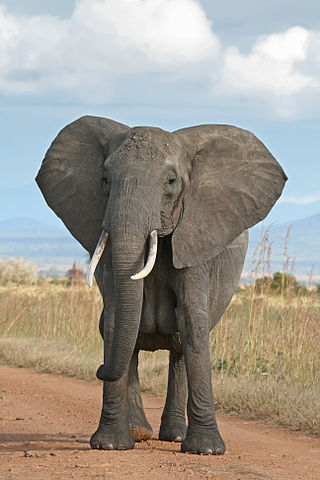

In [5]:
from IPython.display import Image
Image("elephant.jpg")

In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

model = InceptionV3(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

_pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
pred = decode_predictions(_pred, top=3)[0]
print('Predicted:')
print(pred[0])
print(pred[1])
print(pred[2])

####################################
# visualize model
####################################
from keras.utils import plot_model
plot_model(model, to_file="model/model_inception-v3.png", show_shapes=True, show_layer_names=True)


Predicted:
(u'n02504458', u'African_elephant', 0.82281137)
(u'n01871265', u'tusker', 0.15079078)
(u'n02504013', u'Indian_elephant', 0.00080666936)


In [4]:
from IPython.display import Image
Image("model/model_inception-v3.png")